# Time Loss Experiments - Evaluation

In this notebook, we take a look at how different parameters in a Convolutional Neural Network (CNN) affects the model training time and training loss. The model architectures for the networks are in **031_Time-Loss-Experiments_Setup.ipynb** 


* Key findings
    + Model with Batch Normalisation taking longer time to training    
    + The training loss was not reducing when dropout rate of 0.1 was provided
    + Kernel Size of (3,3) trained faster, but (7,7) and (15,15) were taking long time. Training loss could not be evaluated as the number of epochs were less
    + No of images and Pool Size did not seem to have much impact on the Training time
    + Depth of the network also did not have significant impact on training time (need to do further checks)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


## Experiment I

The Base model has below parameters and then train three more model architecutures with a combination of Batch Normalisation and Dropout Layers

* Fixed :
    + No of CNN layers : 2
    + Filter Sizes : 10,20
    + Kernel size : 7x7
    + Pool size : Max Pooling 2x2
    + Dropout percentage : 0.1
    + FC Dense Layers : 2 x 128 units with relu
    + No of epochs : 20
    + Optimisation : RMSProp
    
    
* Variable
    + No if images : 10K and 40K
    + Learning Rates : 1e-2,1e-3,1e-4,1e-5 
    + Batch Sizes : 64,128,256    


In [2]:
#Model name was not set correctly
#df[480:]['params'].replace('Model_Base','modelBase_with_BN_Dropout',regex=True,inplace=True)

df = pd.read_pickle('Time-Loss-Data_BNandDropouts.pkl', compression='infer')
#Split the params column
df[['model','x','IMGs','x','LR','x','BS']] = df['params'].str.split('_',expand=True)
df.drop(columns = 'x',inplace = True)


<AxesSubplot:ylabel='params'>

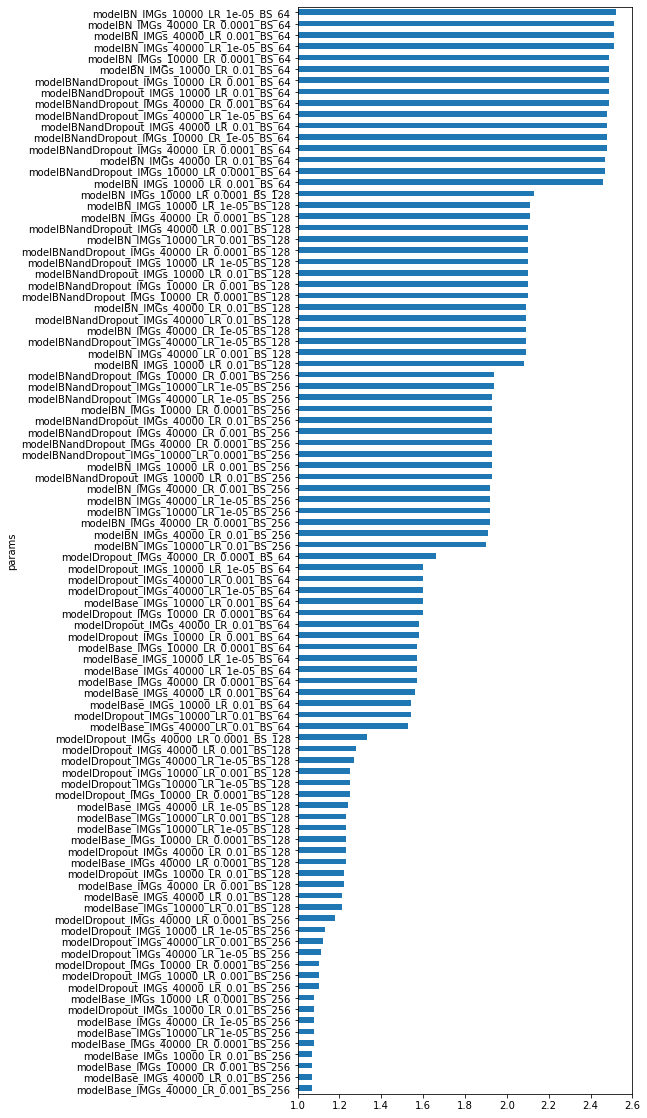

In [3]:
df.groupby('params')['elapsed'].max().sort_values().plot(kind="barh",figsize = (6,20),xlim=(1,2.6))


<AxesSubplot:ylabel='params'>

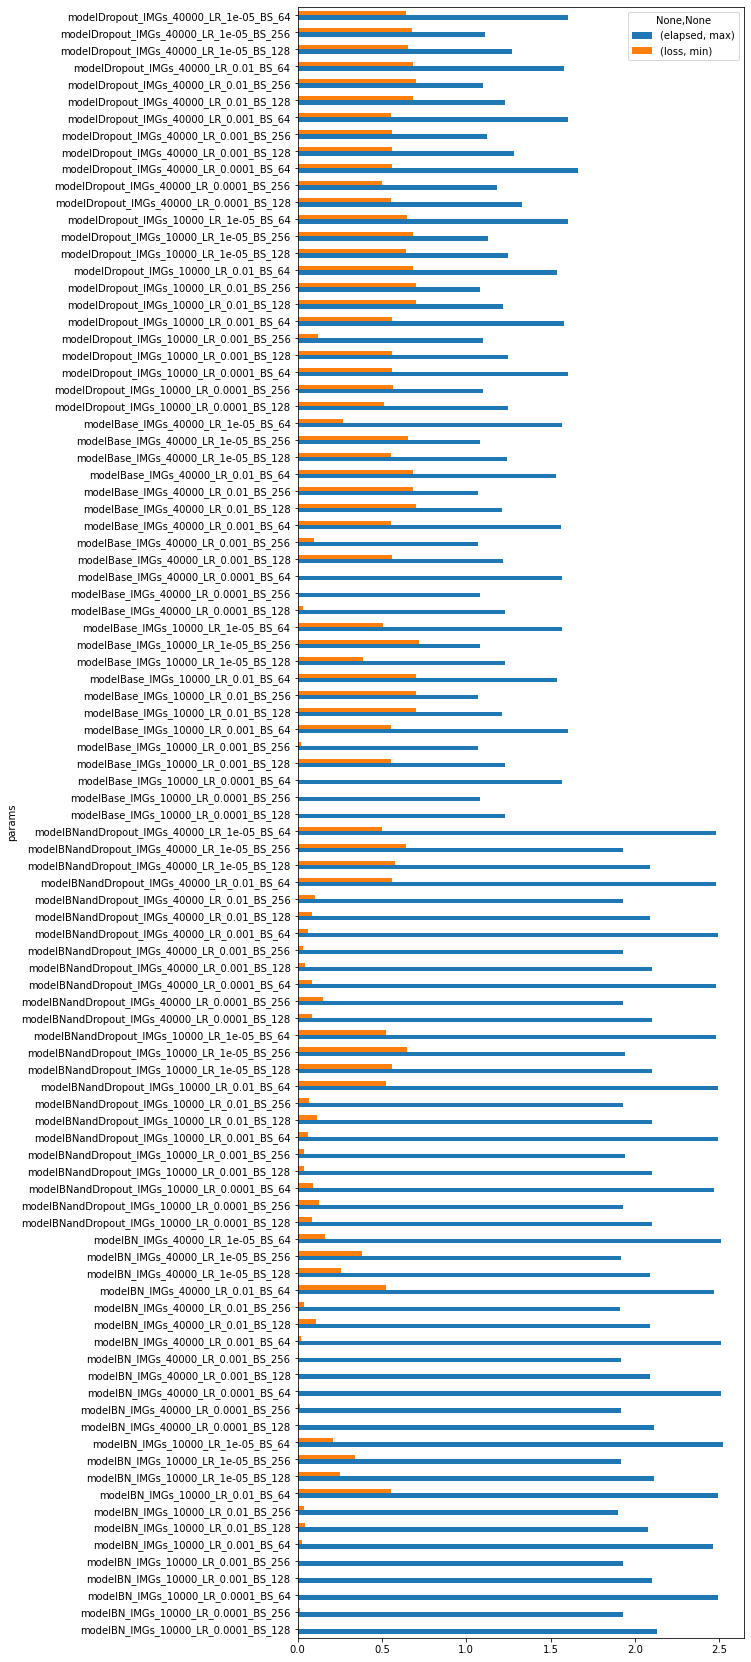

In [4]:
# Loss and Time
df.groupby('params').agg({'elapsed': ['max'],'loss': ['min']}).plot(kind='barh',figsize=(8,30))


#### Summarise the Elapsed Time and Min loss for each model

In [9]:
df_summ = df.groupby('params').agg({'elapsed': ['max'],'loss': ['min']})
df_summ.columns = ['elapsed','min_loss']
df_summ.rename_axis("params",inplace=True)
df_summ.reset_index(inplace=True)

df_summ[['model','x','IMGs','x','LR','x','BS']] = df_summ['params'].str.split('_',expand=True)
df_summ.drop(columns = 'x',inplace = True)



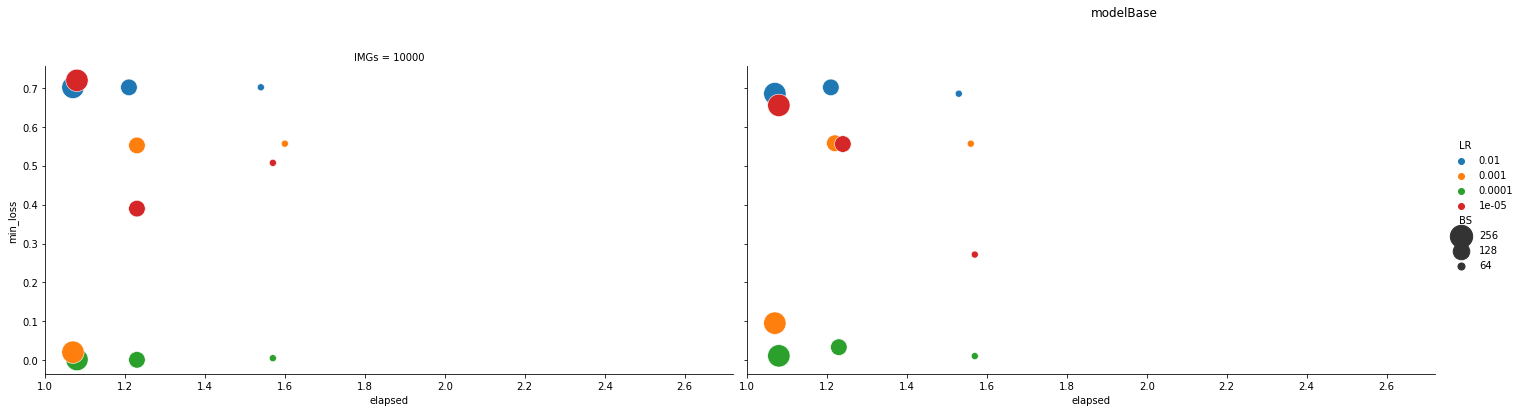

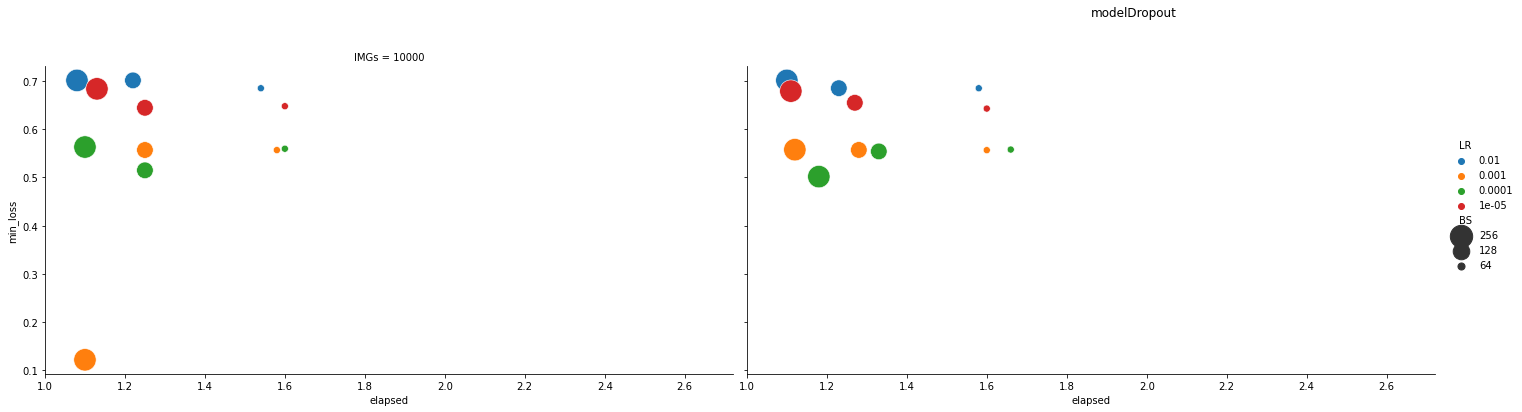

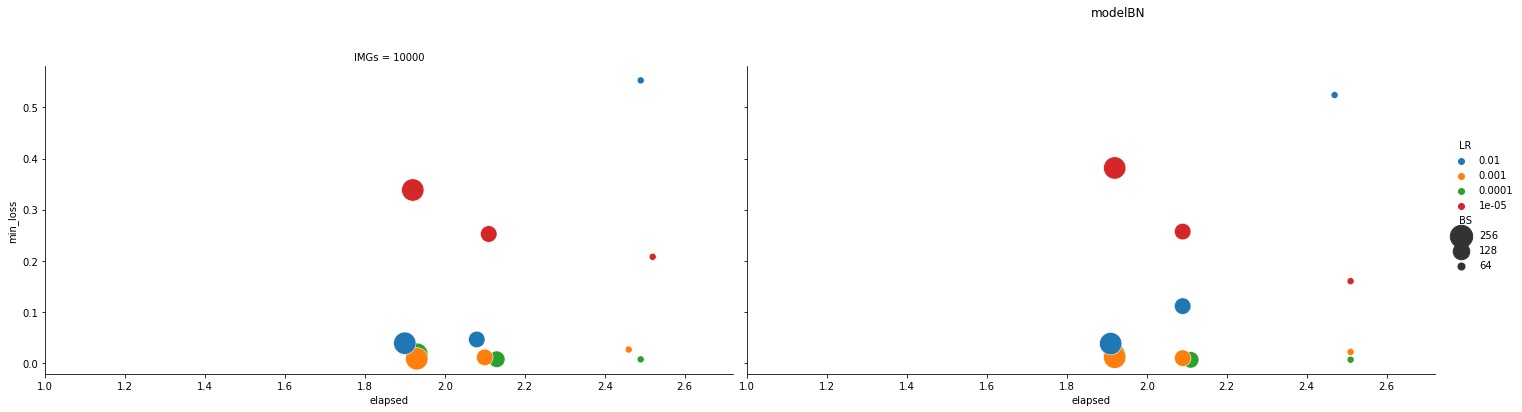

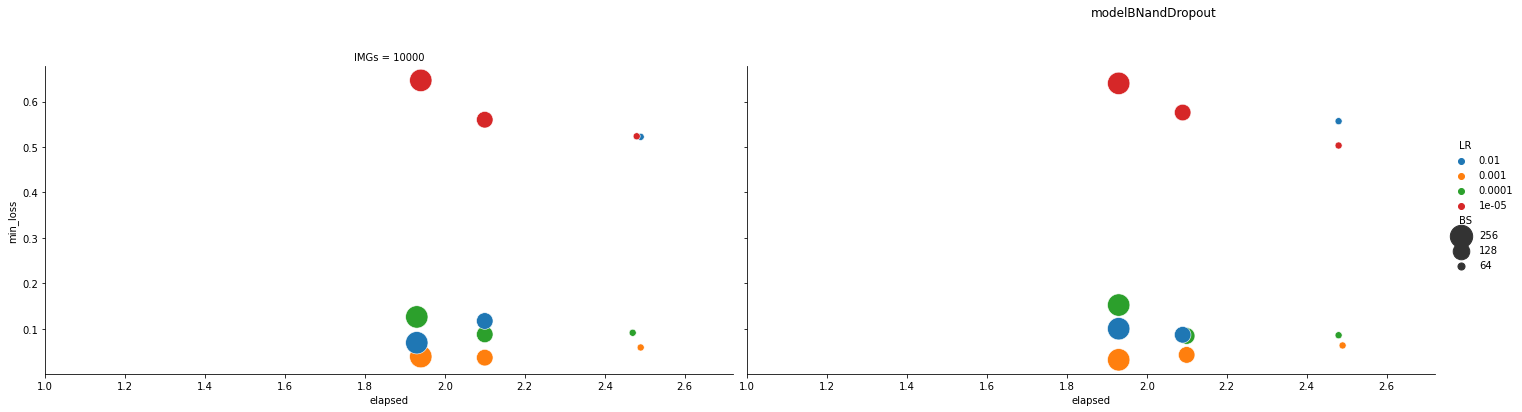

In [10]:
for i in ['modelBase','modelDropout','modelBN', 'modelBNandDropout' ]:
    ax = sns.relplot(x="elapsed", y="min_loss", data=df_summ[df_summ['model'] == i]
                    ,hue="LR", hue_order= ['0.01', '0.001','0.0001','1e-05'] 
                    ,size = "BS", size_order = ['256','128','64'], sizes = (50,500)
                    ,col = "IMGs"
                    ,height=5,aspect =2)
    ax.set(xlim=(1, df_summ['elapsed'].max()+0.2))
    plt.title(i,horizontalalignment = 'left',fontweight = 12,pad= 50)


In [11]:
df_summ.groupby(['IMGs','LR']).mean().sort_values(['IMGs','LR'])

elapsed  min_loss
IMGs  LR                        
10000 0.0001  1.740000  0.165294
      0.001   1.737500  0.212148
      0.01    1.720833  0.461494
      1e-05   1.744167  0.510035
40000 0.0001  1.758333  0.168343
      0.001   1.740833  0.255124
      0.01    1.724167  0.463314
      1e-05   1.740833  0.498050

In [12]:
df_summ.groupby(['IMGs','model']).mean()

elapsed  min_loss
IMGs  model                                
10000 modelBN            2.171667  0.126187
      modelBNandDropout  2.172500  0.240008
      modelBase          1.290000  0.404776
      modelDropout       1.308333  0.577999
40000 modelBN            2.170833  0.128562
      modelBNandDropout  2.169167  0.243737
      modelBase          1.285833  0.401522
      modelDropout       1.338333  0.611009

## Experiment II

The LR 1e-4, BS 128 model with 40K images was selected to evaluate the effect of different CNN Layer parameters

* Fixed :
    + No of Images : 40K
    + Batch Sizes : 128       
    + No of epochs : 40
    + Optimisation : RMSProp
    + Learning Rates : 1e-4
    + Dropout layers with percentage : 0.05
    + FC Dense Layers : 2 x 128 units with relu
    + Batch Normalisation
    
* Variable
    + No of layers : Deep, Deeper, Deepest
    + Filter Sizes : Variable
    + Kernel size : (3x3,7x7,15x15)
    + Pool size : Max Pooling (2x2,6x6,10x10)   
  



In [38]:
df = pd.read_pickle("./Time-Loss-Data_FilterKernelPool.pkl")
df.reset_index(inplace=True)

# df.rename_axis("epoch")
#Split the params column
df[['model','x','Kernel','x','PoolSize']] = df['params'].str.split('_',expand=True)
df.drop(columns = 'x',inplace = True)


* Depth of the network has no impact on the training time
* Large kernel size means more training time
* Pool Size also has not impact on training time

Create Deepest network
Keep Kernel size as 3,3
Try different pool sizes to get min loss



<AxesSubplot:ylabel='params'>

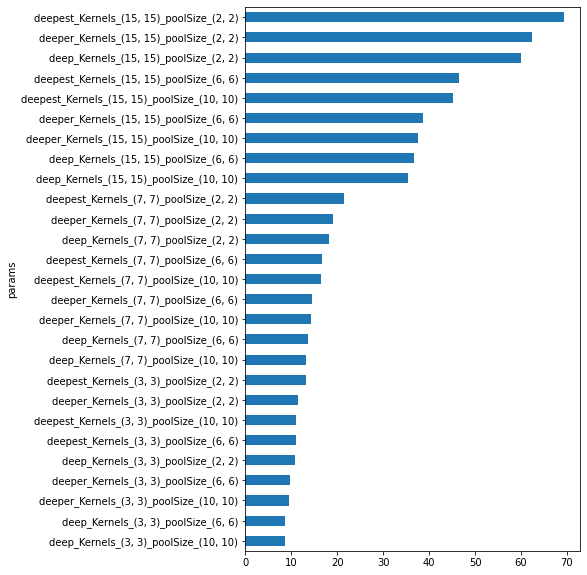

In [15]:
# filtersDict = {'deep' : [10,15,20,25,30]
#                         ,'deeper':[10,15,20,25,30,35,40,45,50,55,60]
#                         ,'deepest':[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

df.groupby('params')['elapsed'].max().sort_values().plot(kind="barh",figsize = (6,10))


<AxesSubplot:ylabel='params'>

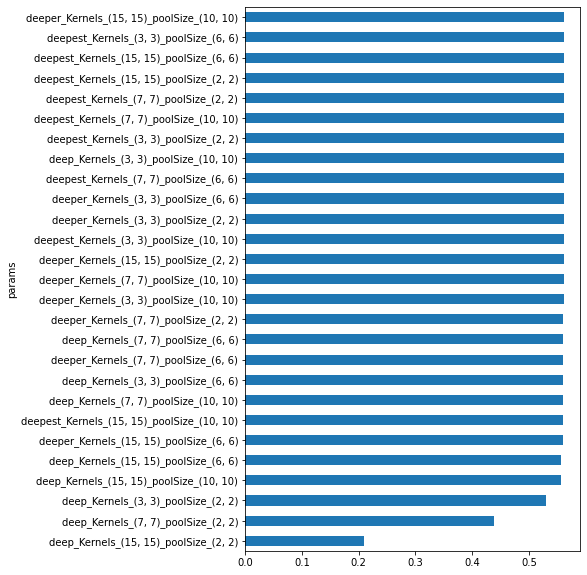

In [16]:
# Loss and Time
#df.groupby('params').agg({'elapsed': ['max'],'loss': ['min']}).plot(kind='barh',figsize=(8,30))
df.groupby('params')['loss'].min().sort_values().plot(kind="barh",figsize = (6,10))

# dff = df.groupby('params').agg({'elapsed': ['max'],'loss': ['min']})
# dff.columns = ['time','loss']
# dff.sort_values('loss').plot(kind='barh',figsize=(8,30))

In [39]:
df_summ = df.groupby('params').agg({'elapsed': ['max'],'loss': ['min']})
df_summ.columns = ['elapsed','min_loss']
df_summ.rename_axis("params",inplace=True)
df_summ.reset_index(inplace=True)

df_summ['params'].str.split('_',expand=True)
df_summ[['model','x','Kernel','x','PoolSize']] = df_summ['params'].str.split('_',expand=True)
df_summ.drop(columns = 'x',inplace = True)


,params,elapsed,min_loss
0,"deep_Kernels_(15, 15)_poolSize_(10, 10)",35.35,0.555725
1,"deep_Kernels_(15, 15)_poolSize_(2, 2)",60.01,0.208878
2,"deep_Kernels_(15, 15)_poolSize_(6, 6)",36.74,0.556743
3,"deep_Kernels_(3, 3)_poolSize_(10, 10)",8.53,0.561505
4,"deep_Kernels_(3, 3)_poolSize_(2, 2)",10.83,0.529864
5,"deep_Kernels_(3, 3)_poolSize_(6, 6)",8.69,0.560670
6,"deep_Kernels_(7, 7)_poolSize_(10, 10)",13.21,0.560482
7,"deep_Kernels_(7, 7)_poolSize_(2, 2)",18.18,0.438598
8,"deep_Kernels_(7, 7)_poolSize_(6, 6)",13.61,0.560695
9,"deeper_Kernels_(15, 15)_poolSize_(10, 10)",37.58,0.562144


In [44]:
df_summ.groupby(['model'])['elapsed','min_loss'].mean()


,elapsed,min_loss
model,,
deep,22.794444,0.503684
deeper,24.142222,0.561127
deepest,27.886667,0.561600


In [46]:
df_summ.groupby(['PoolSize'])['elapsed','min_loss'].mean()

,elapsed,min_loss
PoolSize,,
"(10, 10)",21.244444,0.560631
"(2, 2)",31.794444,0.505094
"(6, 6)",21.784444,0.560686


## Experiment III

### Change network size and pool size


In [90]:
df.to_pickle('./Time-Loss-Data_LayersPool_OLD.pkl')



In [91]:
df = pd.read_pickle('./Time-Loss-Data_LayersPool_OLD.pkl')
df.reset_index(inplace=True)

df[['model','x','poolsize']] = df['params'].str.split('_',expand=True)
df.drop(columns = 'x',inplace = True)



<AxesSubplot:ylabel='params'>

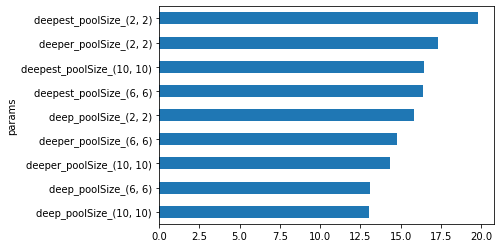

In [92]:
df.groupby('params')['elapsed'].max().sort_values().plot(kind="barh") #,figsize = (6,5))


<AxesSubplot:ylabel='params'>

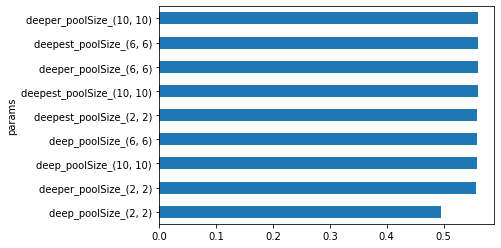

In [93]:
df.groupby('params')['loss'].min().sort_values().plot(kind="barh") #,figsize = (6,5))

[(0.48, 0.6)]

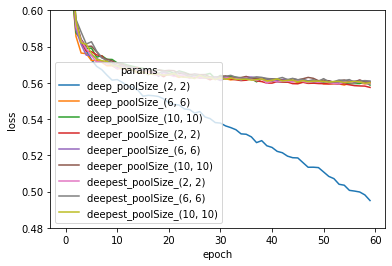

In [94]:
ax = sns.lineplot(data=df, x='epoch', y='loss', hue='params')
ax.set(ylim=(0.48, 0.6))

## Experiment IV

Not continued because models seem to be learning slowly with 1e-4 and 0.05 dropout

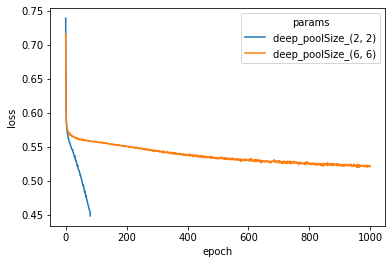

In [98]:
df = pd.read_pickle('./Time-Loss-Data_LayersPool.pkl')
df.reset_index(inplace=True)

df[['model','x','poolsize']] = df['params'].str.split('_',expand=True)
df.drop(columns = 'x',inplace = True)

ax = sns.lineplot(data=df, x='epoch', y='loss', hue='params')
# ax.set(ylim=(0.48, 0.6))

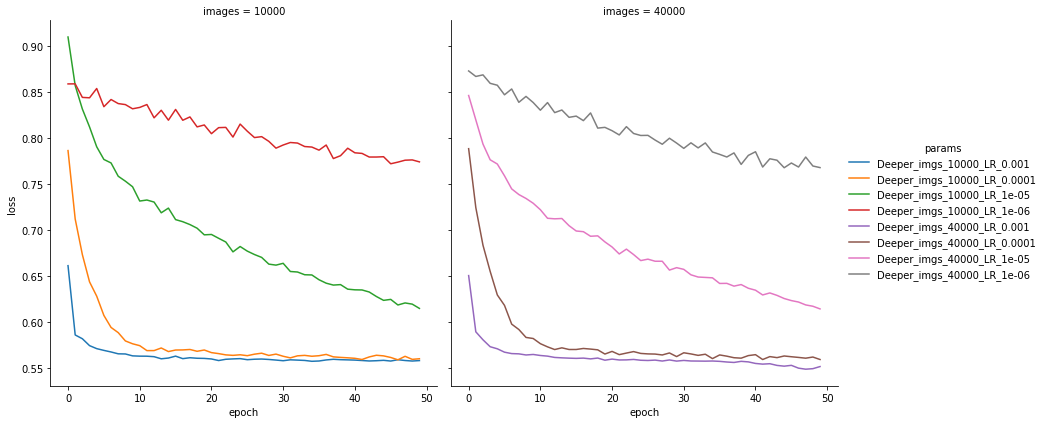

In [123]:
df = pd.read_pickle('./Time-Loss-Data_Find-LR-for-Deeper-Network.pkl')
df.reset_index(inplace=True)

df[['model','x','images','x','LR']] = df['params'].str.split('_',expand=True)
df.drop(columns = 'x',inplace = True)

df
# ax = sns.lineplot(data=df, x='epoch', y='loss', hue='params')
# ax.set(ylim=(0.48, 0.6))

g = sns.FacetGrid(df, col="images", hue="params",height =6 ) #, col_wrap=5)
g.map(sns.lineplot, 'epoch','loss')
g.add_legend()
# plt.show()





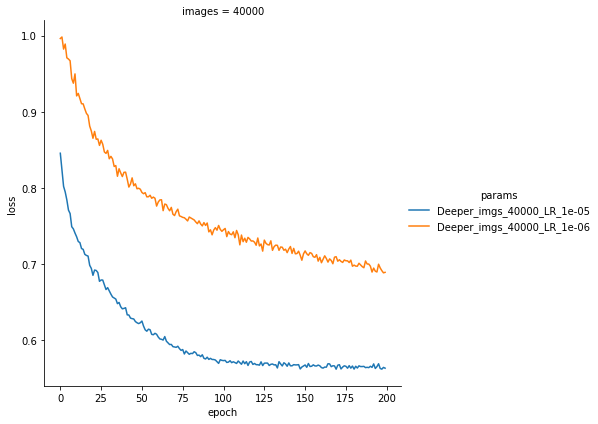

In [124]:
df = pd.read_pickle('./Time-Loss-Data_Find-LR-for-Deeper-Network_MoreEpochs.pkl')
df.reset_index(inplace=True)

df[['model','x','images','x','LR']] = df['params'].str.split('_',expand=True)
df.drop(columns = 'x',inplace = True)

df
# ax = sns.lineplot(data=df, x='epoch', y='loss', hue='params')
# ax.set(ylim=(0.48, 0.6))

g = sns.FacetGrid(df, col="images", hue="params",height =6 ) #, col_wrap=5)
g.map(sns.lineplot, 'epoch','loss')
g.add_legend()
# plt.show()





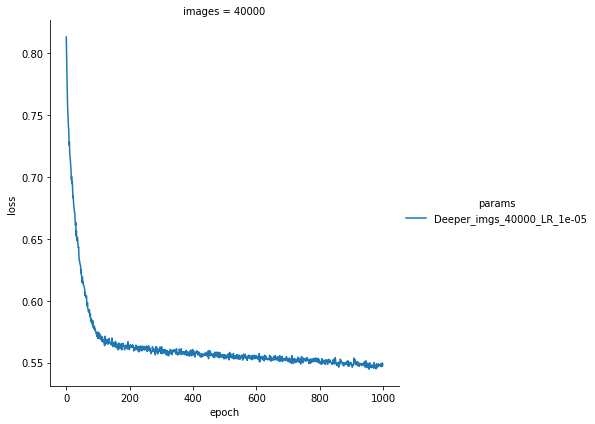

In [125]:
df = pd.read_pickle('./Time-Loss-Data_Find-LR-for-Deeper-Network_MoreEpochs2.pkl')
df.reset_index(inplace=True)

df[['model','x','images','x','LR']] = df['params'].str.split('_',expand=True)
df.drop(columns = 'x',inplace = True)

df
# ax = sns.lineplot(data=df, x='epoch', y='loss', hue='params')
# ax.set(ylim=(0.48, 0.6))

g = sns.FacetGrid(df, col="images", hue="params",height =6 ) #, col_wrap=5)
g.map(sns.lineplot, 'epoch','loss')
g.add_legend()
# plt.show()



